<a href="https://colab.research.google.com/github/Apofice2/Tp/blob/main/(Alauze_Matthieu)TPmachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import pandas as pd
import csv
from tensorflow import kerasv
from sklearn.preprocessing import Normalizer
#import de quelque



In [ ]:
#Creation d'un nouveau dataset dans lequel il n y a que la ligne J pris en compte
def newDataset(dataset0):
  newDataset=pd.DataFrame(dataset0[dataset0['Lgn']=='J'])
  return newDataset


newDataset=newDataset(dataset)





In [ ]:
def one_hot_vector(dataframe, nom_col):
  one_hot = pd.get_dummies(dataframe[nom_col])
  new_dataframe = dataframe.join(one_hot)
  return new_dataframe.drop(columns=[nom_col])

def multi_hot_vector(dataframe, list_nom_col):
  new_dataframe = one_hot_vector(dataframe, list_nom_col[0])
  for i in list_nom_col[1:]:
    new_dataframe = one_hot_vector(new_dataframe, i)
  return new_dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#on charge le dataset dans un pandas
dataset = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/affluence_lgn5_10_11_16_2019_01_all_anonym.csv",sep=";")

On manipule le dataset

In [ ]:
dataset

,Jour,Date de comptage,Code CI,Gare,N° de l'arrêt,Horaire R,Horaire T,Durée T,Durée R,Tps échange,...,2-06G1 (Montées),2-06G1 (Descentes),2-07D1 (Montées),2-07D1 (Descentes),2-07G1 (Montées),2-07G1 (Descentes),2-08D1 (Montées),2-08D1 (Descentes),2-08G1 (Montées),2-08G1 (Descentes)
0,mar.,01/01/2019,384008,Birej-Yl-Spmsar,1,03:41:21,03:40:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mar.,01/01/2019,381137,Wacbishd-vkd-Uqc,2,03:45:53,03:46:20,00:00:50,00:01:41,00:00:09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mar.,01/01/2019,381079,Ooys-Zhvgoexg,3,03:48:46,03:49:00,00:00:40,00:01:32,00:00:09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mar.,01/01/2019,381087,Pxqrlqmn,4,03:51:48,03:51:40,00:00:40,00:01:16,00:00:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mar.,01/01/2019,381095,Rn Eoner,5,03:53:58,03:53:40,00:00:40,00:01:24,00:00:46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188042,jeu.,31/01/2019,381087,Pxqrlqmn,4,01:11:54,01:12:00,00:00:40,00:01:18,00:00:06,...,0.0,0.0,2.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
188043,jeu.,31/01/2019,381095,Rn Eoner,5,01:13:59,01:14:00,00:00:40,00:01:23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188044,jeu.,31/01/2019,381095,Rn Eoner,5,01:14:00,01:14:00,00:00:40,00:01:23,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
188045,jeu.,31/01/2019,381848,Ydyvdiiswy,6,01:17:21,01:17:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#description et stat du dataset
dataset.describe()

,Code CI,N° de l'arrêt,Train,Position,Cap. Assis,Cap. totale,Montées,Descentes,Charge,Occ. assise,...,2-06G1 (Montées),2-06G1 (Descentes),2-07D1 (Montées),2-07D1 (Descentes),2-07G1 (Montées),2-07G1 (Descentes),2-08D1 (Montées),2-08D1 (Descentes),2-08G1 (Montées),2-08G1 (Descentes)
count,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,188047.000000,...,77812.000000,77812.000000,77812.000000,77812.000000,77812.00000,77812.000000,29845.000000,29845.000000,29845.000000,29845.000000
mean,272632.453801,4.933873,127870.288651,1.425559,424.297202,838.001595,35.794168,35.794168,120.307402,28.224800,...,2.159358,2.627191,3.594214,2.222241,4.18866,1.710700,3.230256,2.264299,3.015312,1.548635
std,132443.235452,2.757958,10031.276979,0.494429,45.968595,80.944700,69.447599,68.789491,128.636896,29.999072,...,9.077770,6.945796,17.582521,6.665305,20.04237,4.995191,16.752795,8.252489,15.815215,5.490694
min,113001.000000,1.000000,113600.000000,1.000000,380.000000,760.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116111.000000,3.000000,118837.000000,1.000000,380.000000,760.000000,2.000000,2.000000,30.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,276188.000000,5.000000,136533.000000,1.000000,380.000000,760.000000,11.000000,12.000000,78.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,381137.000000,7.000000,137597.000000,2.000000,472.000000,922.000000,40.000000,39.000000,170.000000,39.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,654798.000000,17.000000,137787.000000,2.000000,472.000000,922.000000,1196.000000,945.000000,1196.000000,253.000000,...,145.000000,92.000000,268.000000,95.000000,258.00000,93.000000,237.000000,104.000000,220.000000,114.000000


In [ ]:
#on supprime les données inutiles pour cela on créer un dataset
df=dataset[["Jour","Mission","N° de l'arrêt","Horaire T","Descentes","Montées","Charge"]]


In [ ]:
df

,Jour,Mission,N° de l'arrêt,Horaire T,Descentes,Montées,Charge
0,mar.,ZRWE,1,03:40:00,0,73,73
1,mar.,ZRWE,2,03:46:20,6,3,70
2,mar.,ZRWE,3,03:49:00,6,5,69
3,mar.,ZRWE,4,03:51:40,6,3,66
4,mar.,ZRWE,5,03:53:40,4,2,64
...,...,...,...,...,...,...,...
188042,jeu.,CMGV,4,01:12:00,13,2,16
188043,jeu.,CMGV,5,01:14:00,2,0,11
188044,jeu.,CMGV,5,01:14:00,2,0,14
188045,jeu.,CMGV,6,01:17:00,11,0,0


In [ ]:
#description statistique du dataset
df.describe()


,N° de l'arrêt,Descentes,Montées,Charge
count,188047.000000,188047.000000,188047.000000,188047.000000
mean,4.933873,35.794168,35.794168,120.307402
std,2.757958,68.789491,69.447599,128.636896
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,30.000000
50%,5.000000,12.000000,11.000000,78.000000
75%,7.000000,39.000000,40.000000,170.000000
max,17.000000,945.000000,1196.000000,1196.000000


In [ ]:
#On se fait une idée sur la correlation des données du dataset (sur les valeurs qsui nous interesses)
df.corr()

,N° de l'arrêt,Descentes,Montées,Charge
N° de l'arrêt,1.000000,0.294357,-0.336563,-0.182404
Descentes,0.294357,1.000000,-0.094393,0.020927
Montées,-0.336563,-0.094393,1.000000,0.605988
Charge,-0.182404,0.020927,0.605988,1.000000


In [ ]:
#normalization de l'heure
import math
import re

def normalisation_heure():

  cosMin = []
  sinMin = []

  for horr in df['Horaire T'] :
    reg = "\d{2}:\d{2}:\d{2}"
    m = re.findall(reg, horr)

    #m= m[0][:5]
    """
    reg = "\d{2}:\d{2}"
    m = re.findall(reg, m)
    """
    min = int(m[0][:2])*60*60 + int(m[0][3:5])*60+int(m[0][6:])
    cosMin.append(math.cos(min))
    sinMin.append(math.sin(min))
  dataset["cosMin"]=cosMin
  dataset["sinMin"]=sinMin

normalisation_heure()
dataset["cosMin"] , dataset["sinMin"]


(0         0.563376
 1        -0.449097
 2         0.242100
 3        -0.023302
 4        -0.599426
             ...   
 188042   -0.952303
 188043   -0.598170
 188044   -0.598170
 188045   -0.284038
 188046   -0.284038
 Name: cosMin, Length: 188047, dtype: float64, 0        -0.826201
 1         0.893483
 2        -0.970251
 3         0.999728
 4         0.800430
             ...   
 188042   -0.305155
 188043   -0.801369
 188044   -0.801369
 188045    0.958813
 188046    0.958813
 Name: sinMin, Length: 188047, dtype: float64)

In [ ]:
dataset["cosMin"],dataset["Horaire T"]

(0         0.563376
 1        -0.449097
 2         0.242100
 3        -0.023302
 4        -0.599426
             ...   
 188042   -0.952303
 188043   -0.598170
 188044   -0.598170
 188045   -0.284038
 188046   -0.284038
 Name: cosMin, Length: 188047, dtype: float64, 0         03:40:00
 1         03:46:20
 2         03:49:00
 3         03:51:40
 4         03:53:40
             ...   
 188042    01:12:00
 188043    01:14:00
 188044    01:14:00
 188045    01:17:00
 188046    01:17:00
 Name: Horaire T, Length: 188047, dtype: object)

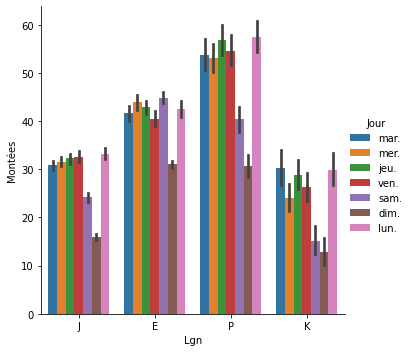

In [ ]:
#on affiche un graphe plusieurs valeurs
import seaborn as sns

sns.catplot(
    data=dataset, kind="bar",  x="Lgn", y="Montées", hue='Jour'
)

In [ ]:


"lun."=="lun."

True

In [ ]:
#on numerise les dates


def dayConversion(day):
  jourIndex=["lun.","mar.","mer.","jeu.","ven.","sam.","dim."]
  newday=[]
  for k in jourIndex:
    newday.append(int(k==day))
  return newday




dataset["normDay"]=dataset["Jour"].apply(dayConversion)


dataset["normDay"]


0         [0, 1, 0, 0, 0, 0, 0]
1         [0, 1, 0, 0, 0, 0, 0]
2         [0, 1, 0, 0, 0, 0, 0]
3         [0, 1, 0, 0, 0, 0, 0]
4         [0, 1, 0, 0, 0, 0, 0]
                  ...          
188042    [0, 0, 0, 1, 0, 0, 0]
188043    [0, 0, 0, 1, 0, 0, 0]
188044    [0, 0, 0, 1, 0, 0, 0]
188045    [0, 0, 0, 1, 0, 0, 0]
188046    [0, 0, 0, 1, 0, 0, 0]
Name: normDay, Length: 188047, dtype: object

## Régression polynomial

In [ ]:
#import ect...
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import train_test_split

X=newDataset['Jour'] , newDataset['cosMin'] , newDataset['sinMin'] ,newDataset['Mission']

y=newDataset['charge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

